In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = '/home/pi/Downloads/car_evaluation.csv'
df = pd.read_csv(data,header = None)

In [3]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
# Exploratory data analysis
# view dimension of dataset
df.shape

(1728, 7)

In [5]:
# Rename column names
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [6]:
# lets again preview the dataset
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [7]:
# view summery of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 47.3+ KB


In [8]:
# Frequency distribution of values in variable
# Now, I will check the frequency counts of categorical varialbles
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [9]:
for col in col_names:
    print(df[col].value_counts())

vhigh    432
med      432
low      432
high     432
Name: buying, dtype: int64
vhigh    432
med      432
low      432
high     432
Name: maint, dtype: int64
4        432
3        432
5more    432
2        432
Name: doors, dtype: int64
more    576
4       576
2       576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
med     576
low     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [10]:
# we can that the doors and persons are categoricals in nature.
# I will treat them as cateigorical variable


In [11]:
# Summary of variable
# There are 7 variable in the dataset. All the variable are of categorical data type
# These are given by buying,maint,doors,persons,lug_boot,saffety and class
# class is the target variable

In [12]:
# Explore class variable
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [13]:
# The class target variable is ordinal nature

In [14]:
# Missing values in variables
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [15]:
X  = df.drop(['class'],axis = 1)
y = df['class']

In [16]:
# Splits data into separate training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.3,random_state =42)

In [17]:
X_train.shape,X_test.shape

((1209, 6), (519, 6))

In [18]:
# Feature Engineering
# Feature Engineering is the process of transforming raw data into
# useful features that help us to understand our model better and increse its predictive power

In [19]:
# first check the data types of variable
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [20]:
# Encode categorical variable
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1178,med,med,5more,4,big,high
585,high,high,3,more,small,low
1552,low,med,3,4,med,med
1169,med,med,5more,2,big,high
1033,med,high,4,2,big,med


In [21]:
# we can see that all the variables are ordinal categorical data type

In [22]:
# import category encoder
import category_encoders as ce

In [23]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.fit_transform(X_test)

In [24]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1178,1,1,1,1,1,1
585,2,2,2,2,2,2
1552,3,1,2,1,3,3
1169,1,1,1,3,1,1
1033,1,2,3,3,1,3


In [25]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,3,3,3,1
1201,1,4,4,1,3,3
628,2,2,1,3,1,3
1498,3,2,1,1,3,3
1263,1,4,3,2,3,2


In [26]:
# Random forest classifier model with parameter
from sklearn.ensemble import RandomForestClassifier

# instatiate the classifier
rfc = RandomForestClassifier(random_state=0)

# fit the model 
rfc.fit(X_train,y_train)

# Predict the Test set
y_pred = rfc.predict(X_test)


In [27]:
# check accuracy score 
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees: {0:0.4f}'. format(accuracy_score(y_test,y_pred)))

Model accuracy score with 10 decision-trees: 0.9037


Here, I have build the random forest classifier model with default parameter of n_estimator= 10.So, I have used 10 decision trees to build the model ,
Now,I will increse the number of decision trees and see its effects on accuracy

In [28]:
# Random Forest Classifier model with parameter n_estimator = 100
rfc_100 = RandomForestClassifier(n_estimators=100,random_state=0)

# fit the model to the training set
rfc_100.fit(X_train,y_train)

# predict on the test set results
y_pred_100 = rfc_100.predict(X_test)

In [29]:
# check the accuracy of 100 estimator
print('Model accuracy score with 10 decision-trees: {0:0.4f}'. format(accuracy_score(y_test,y_pred_100)))

Model accuracy score with 10 decision-trees: 0.9037


Find important features with Random Forest model

In [30]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [31]:
# view the feature scores
features_scores = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
features_scores

safety      0.256484
persons     0.225638
buying      0.195181
maint       0.153907
lug_boot    0.093149
doors       0.075642
dtype: float64

In [32]:
# We can see that most important features is safety and least important is doors

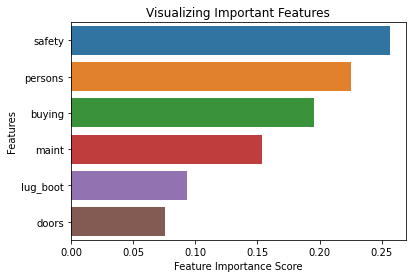

In [34]:
# Visualize features scores of the features
sns.barplot(x= features_scores,y = features_scores.index)
# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()

Build Random Forest model on selected features
Now, I will drop the leat important features doors from the model,rebuild the model and check its on accuracy

In [35]:
# declare feature vector and target variable

X = df.drop(['class', 'doors'], axis=1)

y = df['class']

In [36]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [37]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [38]:
# instantiate the classifier with n_estimators = 100

clf = RandomForestClassifier(random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)


# Predict on the test set results

y_pred = clf.predict(X_test)



# Check accuracy score 

print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with doors variable removed : 0.9264


Confusion matrix:
A confusion matrix used for Summarizing the performance of classifiaction model

In [39]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
print(cm)

[[104  12  10   3]
 [  0  18   0   2]
 [ 10   0 387   0]
 [  3   2   0  20]]


Classification report:
Classification report is another way to evaluate the classification model performance.
It display the pricision,recall,f1,support scores for the model

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         acc       0.89      0.81      0.85       129
        good       0.56      0.90      0.69        20
       unacc       0.97      0.97      0.97       397
       vgood       0.80      0.80      0.80        25

    accuracy                           0.93       571
   macro avg       0.81      0.87      0.83       571
weighted avg       0.93      0.93      0.93       571

